# Election Poll Analysis
We'll look at the opinion poll data from 2016 US election. In the process, We'll answer these following questions.
* Who was being polled and what was their party affiliation?
* Did the poll result favour Clintor or Trump?
* How did the voter sentiment change over time?
* Can you see effect in the polls from the debates?

So, let's get started with the imports

In [27]:
#importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('us_election.csv',parse_dates =['Start Date','End Date','Entry Date/Time (ET)'])
sns.set_style('darkgrid')

In [3]:
df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08 12:16:30+00:00,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08 12:16:30+00:00,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08 12:16:30+00:00,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08 12:16:30+00:00,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08 12:10:06+00:00,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


In [26]:
#information the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   Pollster                1522 non-null   object             
 1   Start Date              1522 non-null   datetime64[ns]     
 2   End Date                1522 non-null   datetime64[ns]     
 3   Entry Date/Time (ET)    1522 non-null   datetime64[ns, UTC]
 4   Number of Observations  1013 non-null   float64            
 5   Population              1522 non-null   object             
 6   Mode                    1522 non-null   object             
 7   Trump                   1522 non-null   float64            
 8   Clinton                 1522 non-null   float64            
 9   Other                   1098 non-null   float64            
 10  Undecided               1460 non-null   float64            
 11  Pollster URL            1522 non-null   obj

# Who was being polled and what was their party affiliation?
So let's create a countplot of the attributes 'Affiliation'

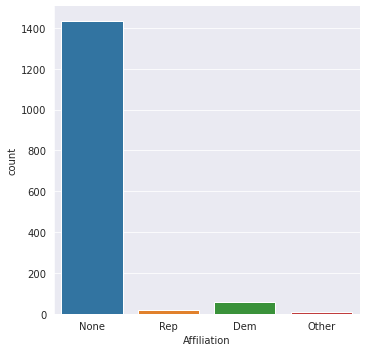

In [5]:
sns.catplot('Affiliation',data=df,kind='count')

Most of the polls had no affiliation. but there was a stronger affiliation for Democratics than Repuclicans

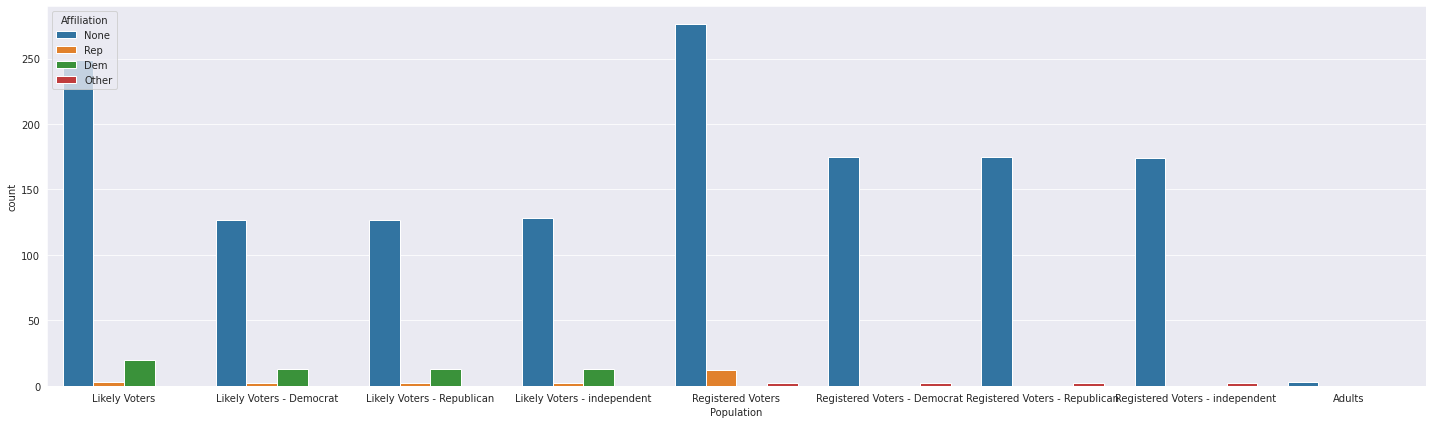

In [14]:
plt.rcParams['figure.figsize'] = (20,6)
sns.countplot('Population',data=df,hue='Affiliation')
plt.tight_layout()

We have a strong portion of registered voters and likely voters that are not affiliated. so we can hope this analysis will be a good representation of the upcoming election.

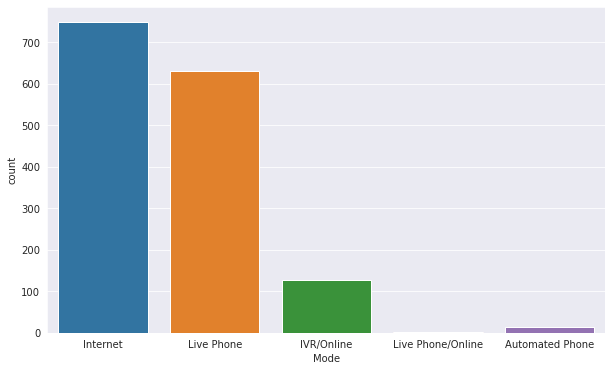

In [16]:
plt.rcParams['figure.figsize'] = (10,6)
sns.countplot('Mode',data =df)

# Did the poll results favour Trump or Clinton?

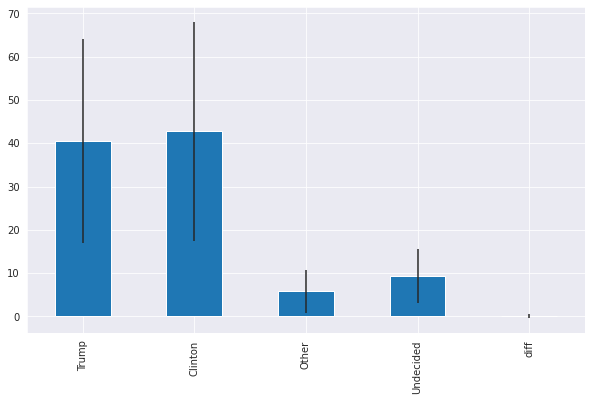

In [17]:
df_mean = df.mean().drop(['Number of Observations','Question Iteration'])
df_std = df.std().drop(['Number of Observations','Question Iteration'])
df_mean.plot(yerr=df_std,kind='bar')

This seems to be very close, with results in favour of Clinton and with higher standard deviation than Trump

# How did the voter sentiment change over the time?

In [22]:
df['diff'] = (df['Clinton'] - df['Trump'])/100
bydate = df.groupby(df['Start Date'],as_index = True).mean()
bydate.tail()

,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,diff
Start Date,,,,,,,
2016-10-31,30546.600000,45.200000,48.600000,3.333333,3.333333,1.400000,0.034000
2016-11-01,734.125000,45.500000,43.571429,4.642857,2.384615,1.285714,-0.019286
2016-11-02,1748.400000,40.823529,42.411765,6.941176,6.823529,1.470588,0.015882
2016-11-03,1386.250000,43.285714,46.428571,4.428571,2.000000,1.000000,0.031429
2016-11-04,1144.461538,43.052632,43.789474,4.052632,4.578947,1.052632,0.007368


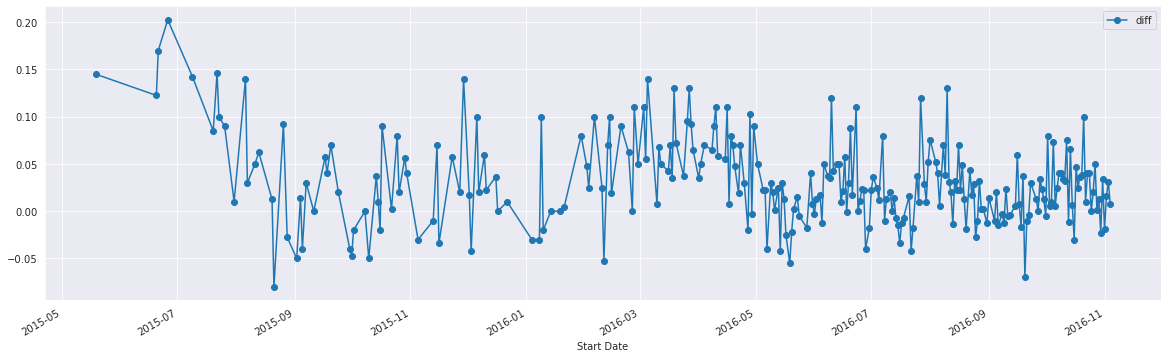

In [25]:
plt.rcParams['figure.figsize'] = (20,6)
bydate.plot(y='diff',marker = 'o')

We see, Clinton got a lean in the polls, on average.


# Can we see the affect in the polls from the debate?

Now we will check if there was any affect from the debates. The first debate was on september 26th. So we will see the line plot from 1st september to last september.

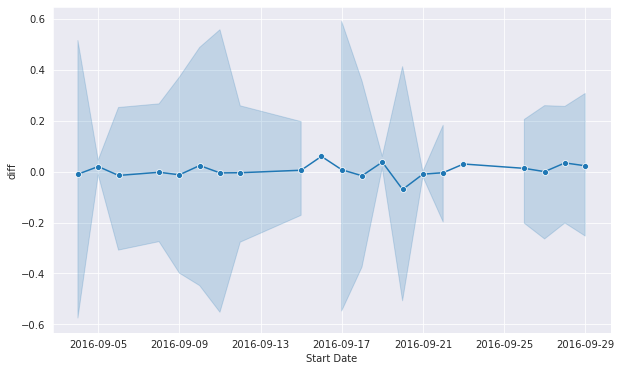

In [20]:
df_sep = df[(df['Start Date']>'2016-09-01')&(df['Start Date']<'2016-09-30')]
sns.lineplot('Start Date','diff',data=df_sep,marker='o')

And what it looks like, is that the sentiment shifted slightly in favour of Clinton, after the debate. Again, it's important to keep in mind that we're dealing with averages.